<a href="https://colab.research.google.com/github/AndreasAvgou/Liver-Disease-Prediction/blob/main/Liver_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Liver Disease Prediction/train_dataset.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Liver Disease Prediction/test_dataset.csv")
train_df.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
5,2306,1255,C,Placebo,14353,F,Y,N,N,N,9.9,NaN,3.57,4.0,462.6,103.40,126.0,276.0,12.1,4.0
6,2525,2065,C,NaN,25357,F,N,Y,NaN,N,0.3,NaN,2.60,103.0,NaN,NaN,200.0,365.0,10.5,4.0
7,6908,1118,D,Placebo,28620,F,NaN,NaN,N,N,2.0,357.0,3.11,94.0,3403.8,NaN,NaN,254.0,10.1,4.0
8,8388,4313,D,NaN,24638,F,N,N,NaN,N,1.2,NaN,3.51,67.0,1850.6,44.21,NaN,434.0,11.1,2.0
9,9132,3240,D,NaN,13860,F,N,N,NaN,N,8.7,NaN,3.02,NaN,NaN,87.62,NaN,102.0,11.2,3.0


In [ ]:
X = train_df.drop(['Stage'], axis=1)
y = train_df['Stage']

In [ ]:
print("============= TRAIN SET =============")
print("Missing Values: " ,np.sum(train_df.isnull().any(axis=1)))
print("Shape: ", train_df.shape)
print("Columns: ", len(train_df.columns))
print("Data types:")
print(train_df.dtypes)
print("============= TEST SET =============")
print("Missing Values: ",(np.sum(test_df.isnull().any(axis=1))))
print("Shape: ", test_df.shape)
print("Columns: ", len(test_df.columns))
print("Data types:")
print(test_df.dtypes)

============= TRAIN SET =============
Missing Values:  6685
Shape:  (6800, 20)
Columns:  20
Data types:
ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object
============= TEST SET =============
Missing Values:  3136
Shape:  (3200, 19)
Columns:  19
Data types:
ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Chol

In [ ]:
train_df.isnull()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False
4,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False
6796,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False
6797,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False
6798,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
test_df.isnull()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False
4,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False
3196,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3197,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
3198,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train_df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,6800.000000,6800.000000,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,6268.608088,1664.055441,22863.223529,1.806147,294.575831,3.036118,68.569121,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,2405.527133,1332.308135,4671.135682,3.218009,128.085317,0.528164,59.637733,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,1239.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,4353.750000,537.000000,19416.500000,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,6599.500000,1443.000000,23367.000000,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,8299.250000,2519.000000,27125.500000,1.800000,353.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,9999.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


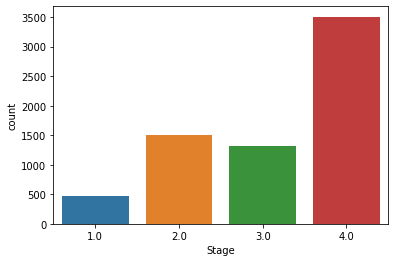

In [ ]:
sns.countplot(train_df['Stage'])

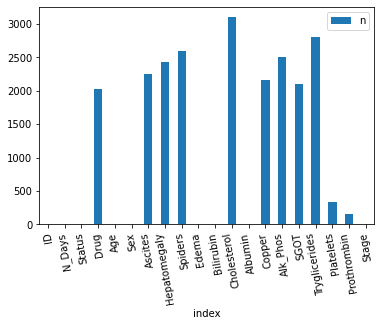

In [ ]:
train_df.isnull().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=100)

In [ ]:
df1 = train_df.dropna()

In [ ]:
df1.isnull()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
275,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
323,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6438,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6471,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
percent_missing = round((train_df.isnull().mean() * 100),2)

In [ ]:
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

,column_name,percent_missing
ID,ID,0.00
N_Days,N_Days,0.00
Status,Status,0.00
Drug,Drug,29.78
Age,Age,0.00
Sex,Sex,0.00
Ascites,Ascites,33.03
Hepatomegaly,Hepatomegaly,35.69
Spiders,Spiders,38.09
Edema,Edema,0.00


In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [ ]:
def plot_mi_scores(scores, title):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    print(ticks)
    plt.figure(figsize=[15,5])
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(f"Mutual Information Scores {title}")

In [ ]:
model_scores = make_mi_scores(X, y)
plot_mi_scores(model_scores.head(15), "Top 15")

ValueError: ignored

In [ ]:
plot_mi_scores(model_scores.tail(15), "Last 15")

NameError: ignored

In [ ]:
def minmax_ratio_tx(min_data, max_data): 
    sub = max_data - min_data
    add = max_data + max_data
    
    minmax = sub/add
    minmax_02 = min_data/max_data
    return minmax, minmax_02

In [ ]:
def quartile_transform(feature_data):
    qrtle_grp = feature_data.rank(pct=True,ascending=False)
    return qrtle_grp

In [ ]:
X.head()
X.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin'],
      dtype='object')